# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [1]:
import time
t = time.time()
import numpy as np
from agent import Agent
agent = Agent(init_pose=[0,0,25,0,0,0], target_pos=[0,0,120], replay_alpha=0, gamma=0.8, runtime=20)
agent.step()
for _ in range(1500):
    agent.step()
    len(agent.memory.memory)
print('Took %d seconds.' % int(t - time.time()))

Using TensorFlow backend.


Distance: 95.0


/media/jay/Storage/Python/jupyter/quadcopter_project/task.py:67: RuntimeWarning: invalid value encountered in double_scalars
  speed_penalty = (1 - max(self.speed, 0.05)/1) ** (1 - (self.vdist / self.init_vdist))


1000 step loss: nan


KeyboardInterrupt: 

In [ ]:
positions, actions, rewards, distances, speeds = agent.play()
for i in range(len(positions)):
    print('Step: %d, action: %.1f, %.1f, %.1f, %.1f, \n \t position: %.1f, %.1f, ++%.1f++, %.1f, %.1f, %.1f, \
          \n \t  dist: %.2f, spd: %.3f, reward: %.3f \n' % 
          (i, actions[i][0], actions[i][1], actions[i][2], actions[i][3],
           positions[i][0], positions[i][1], positions[i][2], positions[i][3], 
           positions[i][4], positions[i][5], distances[i], speeds[i], rewards[i]))

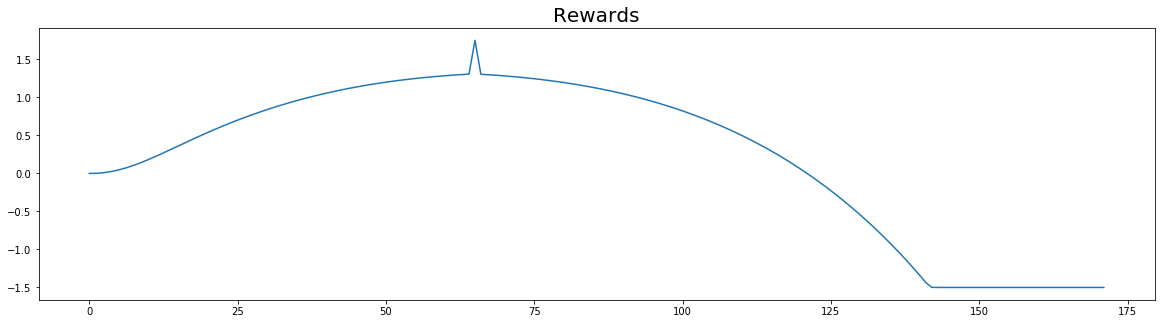

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure('Rewards', figsize=[20,5])
plt.title('Rewards', size=20)
plt.plot(np.arange(0, len(rewards), 1), rewards)
plt.show()

In [2]:
import numpy as np
from agent import Agent
agent = Agent(init_pose=[0,0,10,0,0,0], target_pos=[0,0,120], runtime=20)
positions, actions, rewards, distances, speeds = agent.sample_play([700,700,700,700])
for i in range(len(positions)):
    print('Step: %d, action: %.1f, %.1f, %.1f, %.1f, position: %.1f, %.1f, %.1f, dist: %.2f, spd: %.3f, reward: %.3f' % 
          (i, actions[i][0], actions[i][1], actions[i][2], actions[i][3],
           positions[i][0], positions[i][1], positions[i][2], distances[i], speeds[i], rewards[i]))

Distance: 110.0
Step: 0, action: 700.0, 700.0, 700.0, 700.0, position: 0.0, 0.0, 10.0, dist: 0.00, spd: 0.000, reward: 0.000
Step: 1, action: 700.0, 700.0, 700.0, 700.0, position: 0.0, 0.0, 10.0, dist: 110.00, spd: 0.004, reward: 0.000
Step: 2, action: 700.0, 700.0, 700.0, 700.0, position: 0.0, 0.0, 10.0, dist: 109.98, spd: 0.012, reward: 0.000
Step: 3, action: 700.0, 700.0, 700.0, 700.0, position: 0.0, 0.0, 10.0, dist: 109.96, spd: 0.020, reward: 0.000
Step: 4, action: 700.0, 700.0, 700.0, 700.0, position: 0.0, 0.0, 10.1, dist: 109.94, spd: 0.027, reward: 0.001
Step: 5, action: 700.0, 700.0, 700.0, 700.0, position: 0.0, 0.0, 10.1, dist: 109.90, spd: 0.035, reward: 0.001
Step: 6, action: 700.0, 700.0, 700.0, 700.0, position: 0.0, 0.0, 10.1, dist: 109.86, spd: 0.043, reward: 0.001
Step: 7, action: 700.0, 700.0, 700.0, 700.0, position: 0.0, 0.0, 10.2, dist: 109.81, spd: 0.051, reward: 0.002
Step: 8, action: 700.0, 700.0, 700.0, 700.0, position: 0.0, 0.0, 10.3, dist: 109.75, spd: 0.059, r

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

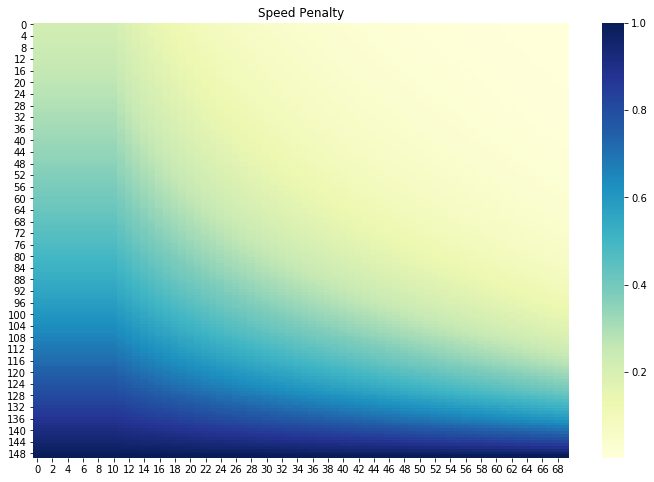

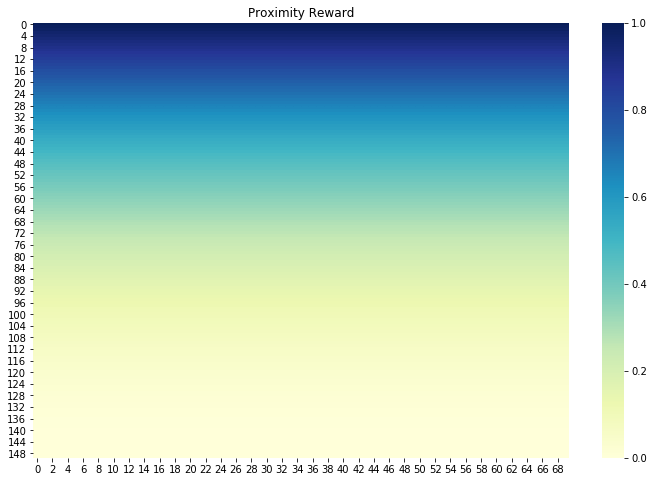

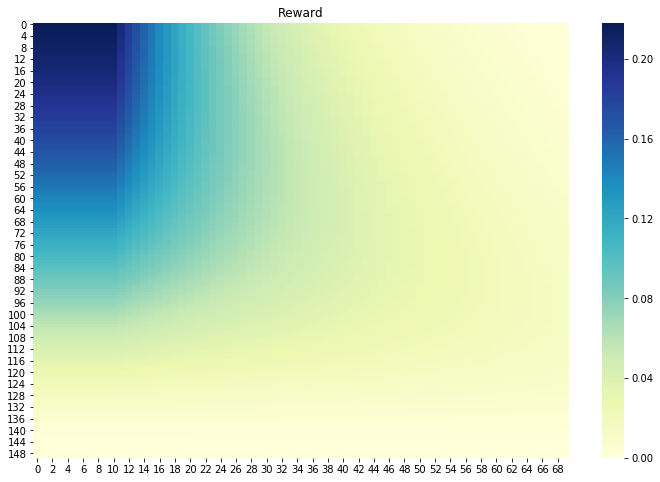

In [29]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

def get_reward(distances, speeds):
    rewards = np.ones([len(distances), len(speeds)])
    speed_penalty = np.ones([len(distances), len(speeds)])
    proximity_reward = np.ones([len(distances), len(speeds)])
    for i, distance in enumerate(distances):
        for j, speed in enumerate(speeds):
            speed_penalty[i][j] = ((1 - (max(speed, 0.1)/1)**0.4) ** (1 - (distance / max(distances))))**3
            if not speed_penalty[i][j]:
                speed_penalty[i][j] = 0.01
            proximity_reward[i][j] = (1 - (distance/max(distances)))**2
            #if distance > 20:
            #    speed_penalty[i][j] = 0.5
            rewards[i][j] = speed_penalty[i][j] * proximity_reward[i][j] 
    return rewards, speed_penalty, proximity_reward

speeds = np.arange(0,0.7,0.01)
distances = np.arange(0,150,1)

rewards, speed_penalty, proximity_reward = get_reward(distances, speeds)

plt.figure('Speed Penalty', figsize=[12,8])
plt.title('Speed Penalty')
sns.heatmap(speed_penalty, cmap="YlGnBu")
plt.show()

plt.figure('Proximity Reward', figsize=[12,8])
plt.title('Proximity Reward')
sns.heatmap(proximity_reward, cmap="YlGnBu")
plt.show()

plt.figure('Reward', figsize=[12,8])
plt.title('Reward')
sns.heatmap(rewards, cmap="YlGnBu")
plt.show()

In [ ]:
## TODO: Plot the rewards.

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: